# Foundation Proxy

We compute the building print Area for each building within each municipality of Thessaloniki

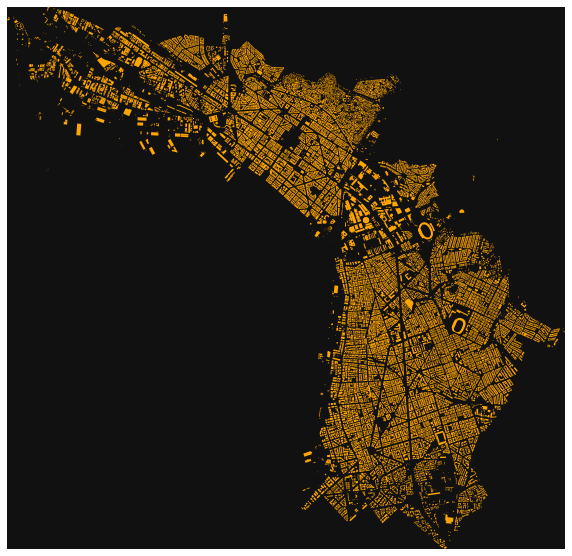

Figure saved as Municipality of Thessaloniki, Greece_building_footprints.tif
GeoJSON file saved as Municipality of Thessaloniki, Greece_building_footprints.geojson
CSV file saved as Municipality of Thessaloniki, Greece_building_footprints.csv


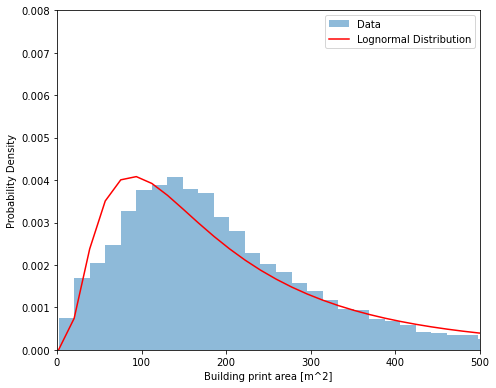

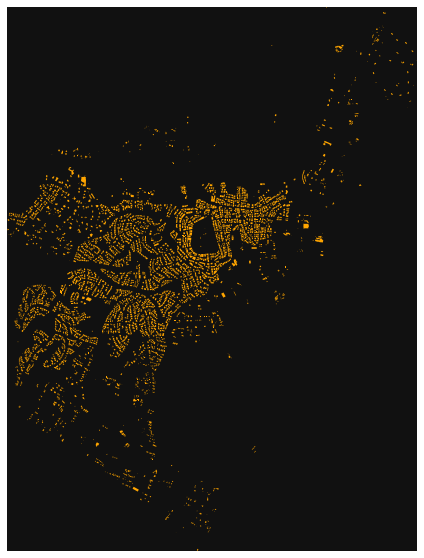

Figure saved as Panorama Municipal Unit, Greece_building_footprints.tif
GeoJSON file saved as Panorama Municipal Unit, Greece_building_footprints.geojson
CSV file saved as Panorama Municipal Unit, Greece_building_footprints.csv


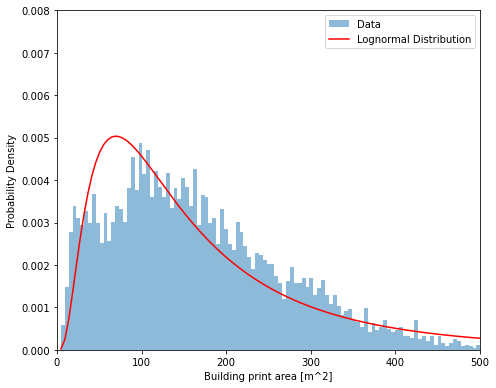

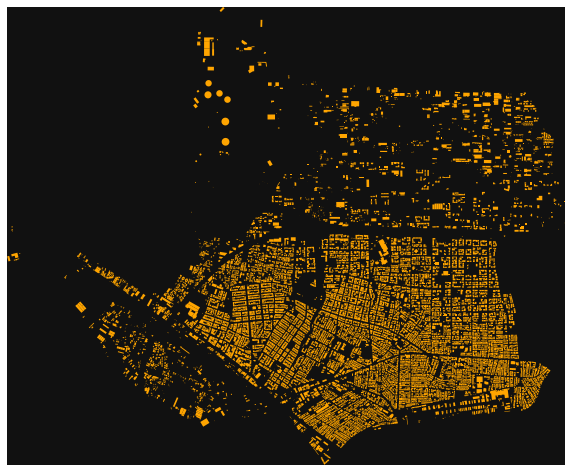

Figure saved as Kordelio - Evosmos Municipality, Greece_building_footprints.tif
GeoJSON file saved as Kordelio - Evosmos Municipality, Greece_building_footprints.geojson
CSV file saved as Kordelio - Evosmos Municipality, Greece_building_footprints.csv


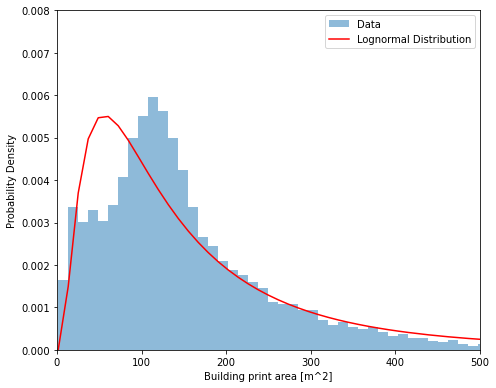

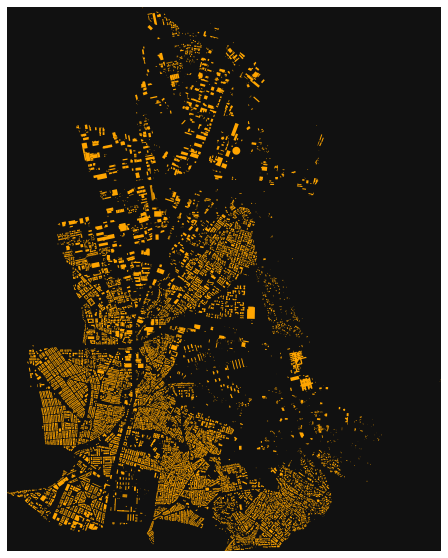

Figure saved as Pavlos Melas Municipality, Greece_building_footprints.tif
GeoJSON file saved as Pavlos Melas Municipality, Greece_building_footprints.geojson
CSV file saved as Pavlos Melas Municipality, Greece_building_footprints.csv


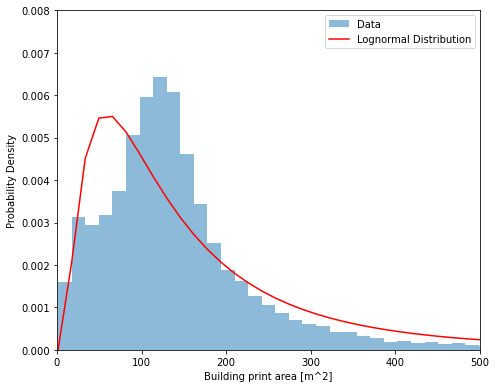

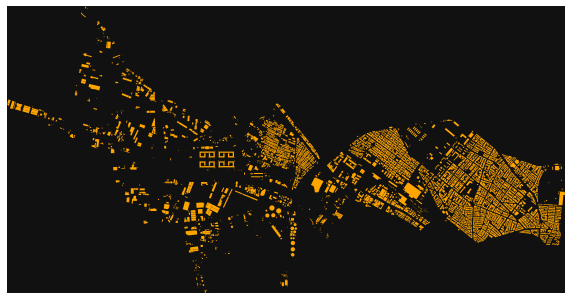

Figure saved as Ampelokipi - Menemeni Municipality, Greece_building_footprints.tif
GeoJSON file saved as Ampelokipi - Menemeni Municipality, Greece_building_footprints.geojson
CSV file saved as Ampelokipi - Menemeni Municipality, Greece_building_footprints.csv


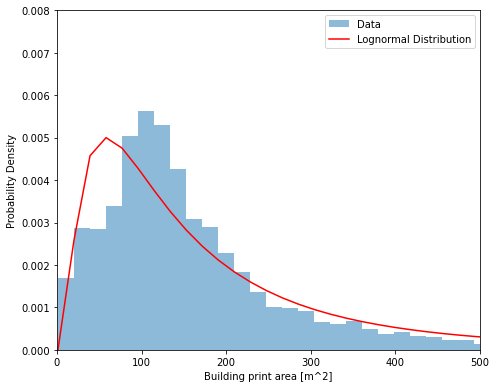

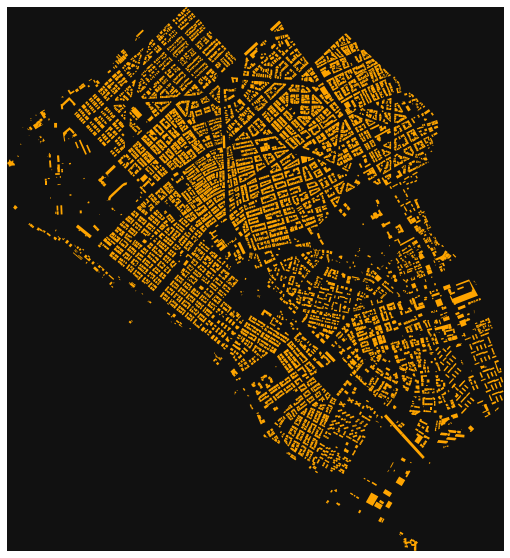

Figure saved as Kalamaria Municipality, Greece_building_footprints.tif
GeoJSON file saved as Kalamaria Municipality, Greece_building_footprints.geojson
CSV file saved as Kalamaria Municipality, Greece_building_footprints.csv


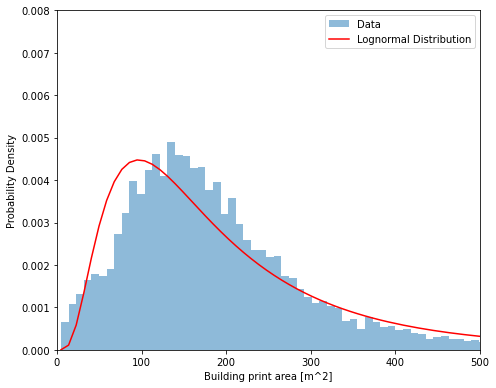

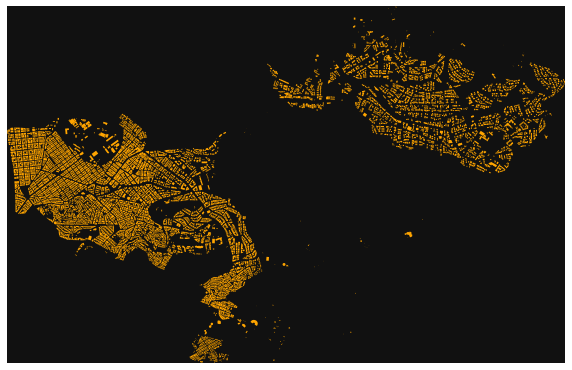

Figure saved as Municipality of Neapoli, Greece_building_footprints.tif
GeoJSON file saved as Municipality of Neapoli, Greece_building_footprints.geojson
CSV file saved as Municipality of Neapoli, Greece_building_footprints.csv


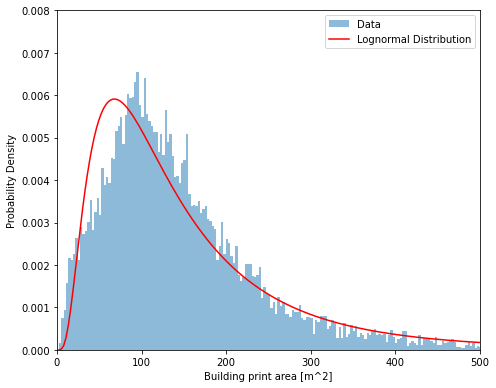

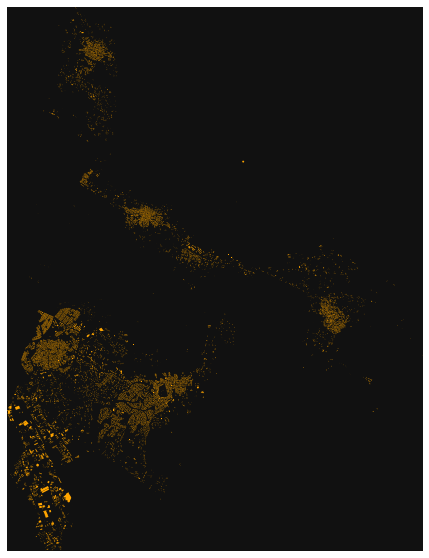

Figure saved as Municipality of Pylaia, Greece_building_footprints.tif
GeoJSON file saved as Municipality of Pylaia, Greece_building_footprints.geojson
CSV file saved as Municipality of Pylaia, Greece_building_footprints.csv


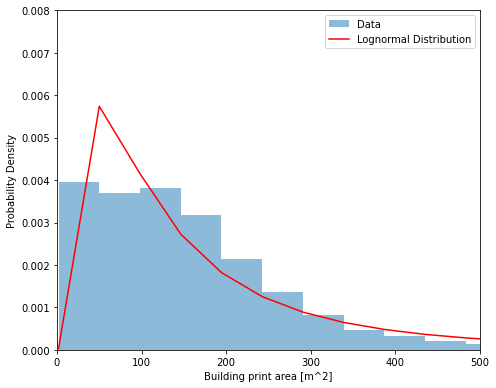

In [17]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import scipy.stats as stats
import warnings


ox.__version__

# Define the municipalities

municipalities = ["Municipality of Thessaloniki, Greece","Panorama Municipal Unit, Greece","Kordelio - Evosmos Municipality, Greece","Pavlos Melas Municipality, Greece","Ampelokipi - Menemeni Municipality, Greece","Kalamaria Municipality, Greece","Municipality of Neapoli, Greece","Municipality of Pylaia, Greece"]
#municipalities = ["Municipality of Thessaloniki, Greece"]

# District Άνω Πόλη, 3rd District of Thessaloniki, Thessaloniki Municipal Unit, Municipality of Thessaloniki, Thessaloniki Regional Unit, Central Macedonia, Macedonia and Thrace, 546 34, Grecia
#districts = "3rd District of Thessaloniki, Greece"


# Initialize arrays to store the variables for all municipalities
shapes = []
locs = []
scale_parameters = []


# Iterate over the municipalities

for mm in municipalities:
    # Get all building footprints in the district
    place = f"{mm}"
    tags = {"building": True}
    crs_projected = "EPSG:32633"  # Change to your desired projected CRS
    gdf = ox.geometries_from_place(place, tags)
    
    gdf_per_shapefile = ox.geocode_to_gdf(place)
    
    
    gdf.shape
    gdf.head(3) # Check the first rows:
    # Save the building footprints as a TIFF image
    output_file = f"{mm}_building_footprints.tif"
    # Filter the specific warning
    warnings.filterwarnings("ignore", message="Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.")

    # Define the output file path
    output_file_sh = f"{mm}_output_file.shp"

    # Save the area as a shapefile
    gdf_per_shapefile.to_file(output_file_sh, driver='ESRI Shapefile')
    
    
    
    fig, ax = ox.plot_footprints(gdf, figsize=(10, 10), save=True, show=True, close=True, filepath=output_file)
    print("Figure saved as", output_file)
    
    # Create a new GeoDataFrame with only the "geometry" column
    footprints_gdf = gpd.GeoDataFrame(geometry=gdf["geometry"])
    
    # Save the footprints GeoDataFrame as a GeoJSON file
    output_file1 = f"{mm}_building_footprints.geojson"
    footprints_gdf.to_file(output_file1, driver="GeoJSON")
    print("GeoJSON file saved as", output_file1)
    
    # Reproject the geometries to a projected CRS for accurate area calculations
    footprints_gdf_projected = footprints_gdf.to_crs(crs_projected)
    
    # Calculate the area of the building footprints
    footprints_gdf_projected["area"] = footprints_gdf_projected.geometry.area
    
    # Select the desired columns
    footprints_gdf_projected = footprints_gdf_projected.loc[:, ["geometry", "area"]]
    
    # Export the geometries to a CSV file
    output_file2 = f"{mm}_building_footprints.csv"
    footprints_gdf_projected.to_csv(output_file2, index=False)
    print("CSV file saved as", output_file2)
    
    # Calculate statistics
    area_array = footprints_gdf_projected["area"].values
    area_array = area_array[area_array != 0]
    
    # Fit a lognormal distribution to the data
    shape, loc, scale = stats.lognorm.fit(area_array, floc=0)
    # Append the variables to the respective arrays
    shapes.append(shape)
    locs.append(loc)
    scale_parameters.append(scale)
    
    
    # Generate points along the x-axis for the fitted lognormal distribution
    x = np.linspace(np.min(area_array), np.max(area_array), 1000)
    
    # Compute the corresponding y-values of the fitted lognormal distribution
    pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)
    
    plt.figure(figsize=(7.0, 5.5))
    # Plot a histogram of the area data
    plt.hist(area_array, bins=1000, density=True, alpha=0.5, label='Data')
    
    # Plot the fitted lognormal distribution
    plt.plot(x, pdf, 'r-', label='Lognormal Distribution')
    
    # Add labels and a legend to the plot
    plt.xlabel('Building print area [m^2]')
    plt.ylabel('Probability Density')
    plt.xlim([0, 500])
    plt.ylim([0, 0.8e-2])
    plt.grid(False)
    plt.tight_layout()
    plt.legend()
  
    # Save the plot
    output_file


In [21]:
import pandas as pd
scales=scale_parameters;
# Calculate statistics

# Convert shapes and scales to arrays
shapes = np.array(shapes)
scales = np.array(scales)
locs = np.array(locs)



print("Estimated Parameters:")
print("Shape:", shapes)
print("Location:", locs)
print("Scale:", scales)



scales=np.log(scales);
mean = np.exp(scales + (shapes ** 2) / 2)
median = np.exp(scales)
mode = np.exp(scales - (shapes ** 2))
std_dev = np.exp(scales + shapes**2 / 2) * np.sqrt(np.exp(shapes**2) - 1)



print("\nStatistics:")
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std_dev)


# Create a DataFrame with the calculated variables and municipalities
data = pd.DataFrame({
    'Municipality': municipalities,
    'Scale': scale,
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Standard Deviation': std_dev
})





Estimated Parameters:
Shape: [0.79809562 0.81564576 0.88189631 0.85661578 0.91368891 0.71549766
 0.75066249 0.96749746]
Location: [0. 0. 0. 0. 0. 0. 0. 0.]
Scale: [167.98748311 135.45280623 120.7343364  120.97469313 132.53319728
 160.88625499 119.16599095 113.94914911]

Statistics:
Mean: [230.98846592 188.90840852 178.121003   174.59633933 201.1894241
 207.81870225 157.94778326 181.9583762 ]
Median: [167.98748311 135.45280623 120.7343364  120.97469313 132.53319728
 160.88625499 119.16599095 113.94914911]
Mode: [88.84851648 69.64042971 55.47050686 58.07822297 57.51269656 96.42453888
 67.83126496 44.68781851]
Standard Deviation: [218.00195673 183.64298994 193.20588094 181.69442857 229.78054832
 169.91893395 137.40552669 226.52852156]


In [22]:
# define the radius from the median 
r = np.sqrt(median / np.pi)
print(r)


[7.31246037 6.566275   6.19926874 6.20543639 6.49512332 7.15623403
 6.15887271 6.02255267]


In [35]:

# Define the Building Heights (typical buildings)

Heights = ["H1","H2","H3","H4","H5","H6","H7","H8","H9"];
H =[2.8,5.6,8.4,11.2,14.0,16.8,19.6,22.4,25.2];


Aspect_ratio = np.ones((len(r), len(H)))
aspect_ratio = np.ones((len(r), len(H)))
for j in range(len(r)):
    for i in range(len(H)):
        aspect_ratio = H[i] / (2 * r[j])
        rounded_aspect_ratio = np.round(aspect_ratio * 2) / 2  # Round to the closest value between 0.5, 1, 1.5, 2, 2.5, and 3
        if rounded_aspect_ratio == 0:  # Adjust 0 to 0.5
            rounded_aspect_ratio = 0.5

        Aspect_ratio[j, i] = rounded_aspect_ratio
        
        
        
# Create a DataFrame with aspect ratio values
data_aspect_ratio = pd.DataFrame(Aspect_ratio, columns=Heights)

# Add the aspect ratio columns to the existing DataFrame
data = pd.concat([data, data_aspect_ratio], axis=1)

# Print the updated DataFrame
print(data)

                                 Municipality     Scale        Mean  \
0        Municipality of Thessaloniki, Greece  5.123889  230.988466   
1             Panorama Municipal Unit, Greece  4.908623  188.908409   
2     Kordelio - Evosmos Municipality, Greece  4.793593  178.121003   
3           Pavlos Melas Municipality, Greece  4.795581  174.596339   
4  Ampelokipi - Menemeni Municipality, Greece  4.886833  201.189424   
5              Kalamaria Municipality, Greece  5.080698  207.818702   
6             Municipality of Neapoli, Greece  4.780517  157.947783   
7              Municipality of Pylaia, Greece  4.735752  181.958376   

       Median       Mode  Standard Deviation        H1        H2        H3  \
0  167.987483  88.848516          218.001957  0.191454  0.382908  0.574362   
1  135.452806  69.640430          183.642990  0.213211  0.426421  0.639632   
2  120.734336  55.470507          193.205881  0.225833  0.451666  0.677499   
3  120.974693  58.078223          181.694429  0.

In [29]:
# Save the DataFrame to an Excel file
data.to_excel('prova.xlsx', index=False)